# <center> T-Tests </center>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats



In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv")
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")



For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


In [3]:
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)



0

In [4]:
zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)


0

In [5]:
# normal test males
result_m = stats.normaltest(male_height)
result_m



NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)

In [6]:
# normal test females
result_f = stats.normaltest(female_height)
result_f



NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)

In [7]:
result = stats.levene(female_height, male_height)
result



LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

In [9]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(female_height,male_height)
result



Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)

In [10]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")



p-value=0.0000000212
Significant: True


# <center> Walkthrough T-Test </center>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [12]:
url = 'https://docs.google.com/spreadsheets/d/1EvADR_JB1Y7tQDGvu-5aBoCEPPS-Dqyca3YY_Jjakdw/gviz/tq?tqx=out:csv&sheet=Cleaned_Super_Hero'
df = pd.read_csv(url)
df.head()



,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# see how many with and without strength
df['Super Strength'].value_counts()



True     274
False    189
Name: Super Strength, dtype: int64

In [14]:
# Filtering out those with and without super strength
strength_df = df.loc[df['Super Strength']== True].copy()
no_strength_df = df.loc[df['Super Strength']== False].copy()



In [15]:
strength_weight = strength_df['Weight']
no_strength_weight = no_strength_df['Weight']



In [16]:
# Check for outliers in weight for strength group
zscores= stats.zscore(strength_weight)
outliers = abs(zscores)>3
np.sum(outliers)



6

In [17]:
# remove outliers from strength group
strength_weight = strength_weight[(np.abs(stats.zscore(strength_weight)) < 3)]



In [18]:
# check for outliers in weight for no strength group
zscores= stats.zscore(no_strength_weight)
outliers = abs(zscores)>3
np.sum(outliers)


1

In [19]:
# remove outlier for no strength group
no_strength_weight = no_strength_weight[(np.abs(stats.zscore(no_strength_weight)) < 3)]



In [20]:
# test the strength group for normality
result_strength_weight = stats.normaltest(strength_weight)
result_strength_weight


NormaltestResult(statistic=105.002416481251, pvalue=1.5813025374989877e-23)

In [22]:
result_no_strength_weight = stats.normaltest(no_strength_weight)
result_no_strength_weight



NormaltestResult(statistic=10.034466263303866, pvalue=0.006622825869229763)

<AxesSubplot: >

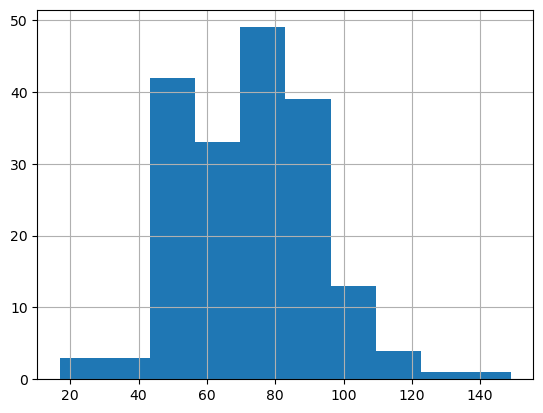

In [23]:
no_strength_weight.hist()

In [24]:
# Test for equal variance
result = stats.levene(strength_weight, no_strength_weight)
result


LeveneResult(statistic=54.1012395290633, pvalue=8.971388915444231e-13)

In [25]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(strength_weight, no_strength_weight, equal_var = False)
result



Ttest_indResult(statistic=9.12425300025232, pvalue=1.0881200502443154e-17)